In [1]:
import sys

sys.path.append("/home/ptbadia/code/tfg/tfg_ttcross/tt_cross")

In [2]:
from src.integrators import (
    ttrc_integrator,
    greedy_cross_integrator,
    tracked_greedycross_integrator,
    tracked_ttrc_integrator,
)
import matplotlib.pyplot as plt
import numpy as np
from src.functions import *

In [45]:
def test_function(x: np.ndarray) -> np.ndarray:
    return np.log(np.prod(x))


def test_function(x: np.ndarray) -> float:
    return np.sin(sum(x)) * np.prod(x * np.exp(-x)) * (3 * np.linalg.norm(x) + 1 + x[0])


def test_function(x: np.ndarray) -> float:
    return np.sin(sum(x)) * np.prod(np.exp(-x))


def test_function2(x: np.ndarray) -> np.ndarray:
    return np.prod(np.sin(x) / 2)

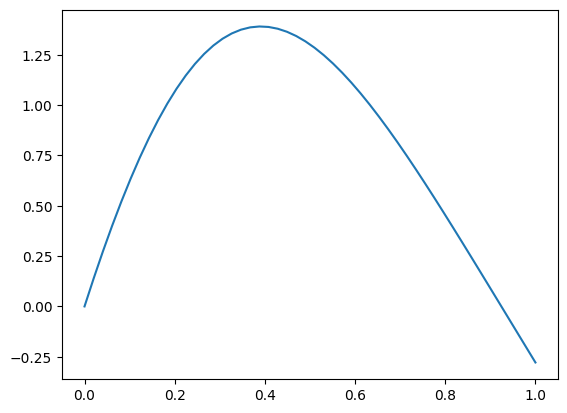

In [54]:
x = np.linspace(0, 1)
y = np.sin(4 * x) * np.exp(-x) + 3 * x - 3 * x**2

plt.plot(x, y)

In [47]:
integrator = tracked_ttrc_integrator(
    func=test_function,
    num_variables=10,
    intervals=np.array([[0, 1] for _ in range(10)]),
    points_per_variable=20,
    sweeps=5,
    initial_bond_guess=5,
    max_bond=10,
    quadrature="Gauss",
)
integrator.integrate()

Initialization done after time: 0.04955863952636719 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5


-0.005841290007543573

In [49]:
integrator.bonds

array([2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
import matplotlib.pyplot as plt

integrator.evolution_dict.items()

dict_items([(155600, -1.0058278129172035e-18), (245200, -1.00582781291716e-18), (334800, -1.00582781291716e-18), (424400, -1.00582781291716e-18), (514000, -1.00582781291716e-18), (603600, -1.00582781291716e-18), (693200, -1.00582781291716e-18), (782800, -1.00582781291716e-18), (872400, -1.00582781291716e-18), (962000, -1.00582781291716e-18)])

In [18]:
integrator.interpolator.bonds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [19]:
integrator = ttrc_integrator(
    func=test_function2,
    num_variables=10,
    intervals=np.array([[0, np.pi] for _ in range(10)]),
    points_per_variable=50,
    sweeps=10,
    initial_bond_guess=5,
    max_bond=20,
    quadrature="Gauss",
)
integrator.integrate()

Initialization done after time: 0.11617398262023926 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5
Sweep 6
Sweep 7
Sweep 8
Sweep 9
Sweep 10


0.9999999999999588

In [20]:
integrator.interpolator.bonds

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
integrator3 = ttrc_integrator(
    func=gaussian,
    num_variables=10,
    intervals=np.array([[-5, 5] for _ in range(10)]),
    points_per_variable=10,
    sweeps=8,
    initial_bond_guess=3,
    max_bond=10,
    quadrature="Trapezoidal",
)
integrator3.integrate()

Initialization done after time: 0.009338855743408203 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5
Sweep 6
Sweep 7
Sweep 8


-6.428747544568117e+111

In [7]:
for i in integrator3.interpolator.i:
    print(i.shape)

(1, 1)
(4, 1)
(7, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(9, 10)
(10, 11)
(10, 12)
(10, 13)
(10, 14)
(10, 15)
(9, 16)
(8, 17)
(7, 18)
(4, 19)


In [22]:
(2 * np.pi) ** 10

95895600.61550897

In [55]:
# In the presence of singularities, if pivot_finder_tol is too high, the integrator will select very similar
# points next to the singularity, resulting in singular matrices and a failed integration.

integrator2 = tracked_greedycross_integrator(
    func=test_function,
    num_variables=30,
    intervals=np.array([[0, 1] for _ in range(30)]),
    points_per_variable=20,
    sweeps=10,
    max_bond=10,
    quadrature="Gauss",
    pivot_finder_tol=1e-6,
)

integrator2.integrate()

Initialization done after time: 0.001094818115234375 seconds and 1 tries.
Sweep 1
Sweep 2


3.599409410753227e-07

In [37]:
for i in integrator2.i:
    print(i)

[[1.]]
[[0.8731659532300754]
 [0.0034357004074525577]
 [0.46173673943325133]
 [0.9965642995925474]]
[[0.8731659532300754 0.1268340467699246]
 [0.0034357004074525577 0.0034357004074525577]
 [0.8731659532300754 0.9965642995925474]
 [0.8731659532300754 0.6138929255708225]]
[[0.8731659532300754 0.1268340467699246 0.3131469556422902]
 [0.0034357004074525577 0.0034357004074525577 0.0034357004074525577]
 [0.0034357004074525577 0.0034357004074525577 0.6868530443577098]
 [0.0034357004074525577 0.0034357004074525577 0.38610707442917747]
 [0.8731659532300754 0.9965642995925474 0.9561172141256629]]
[[0.8731659532300754 0.1268340467699246 0.3131469556422902
  0.8731659532300754]
 [0.0034357004074525577 0.0034357004074525577 0.0034357004074525577
  0.0034357004074525577]
 [0.8731659532300754 0.1268340467699246 0.3131469556422902
  0.3131469556422902]
 [0.0034357004074525577 0.0034357004074525577 0.6868530443577098
  0.1268340467699246]
 [0.0034357004074525577 0.0034357004074525577 0.0034357004074525

In [26]:
integrator2.interpolator.bonds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [27]:
integrator2.evolution_dict

{400: 0.1734877830521058,
 1200: 0.16366103504160545,
 2000: 0.1502779675391693,
 2800: 0.20616162438197405,
 3600: 0.15107876045022756,
 4400: 0.06102370845480326,
 5200: 0.03317247770594936,
 6000: 0.01233820553274095,
 6800: 0.028520753223377028,
 7600: 0.028520753223377028,
 9200: 0.028916388754062355,
 11600: 0.030574417290189334,
 14000: -2089308950789.7756,
 16400: -1690964813782.1316,
 18800: -1074114635654.792,
 21200: -1014927317883.8499,
 23600: 1.076008431741586e+26,
 24800: 4.418670534814469e+25,
 26000: 7.2748132362465785e+25,
 30800: 3.4106724547389498e+25,
 35600: -4.196348868854867e+25,
 40400: -5.1917328132091846e+26,
 45200: -9.862792712921169e+28,
 50000: -2.534283706344681e+26,
 54800: -1.814975499944701e+26,
 58000: -1.9507369798631683e+26,
 59600: -1.9129354439620253e+26,
 61200: -3.309052987110329e+26,
 67600: -1.1446561015462829e+25,
 75600: -4.427159086566745e+38,
 83600: -1.74994007394719e+39,
 91600: 2.8809087918151395e+39,
 99600: 2.919986106975414e+37,
 10

In [23]:
integrator2 = greedy_cross_integrator(
    func=test_function2,
    num_variables=30,
    intervals=np.array([[0, np.pi] for _ in range(30)]),
    points_per_variable=30,
    sweeps=10,
    max_bond=10,
    quadrature="Gauss",
    pivot_finder_tol=1e-12,
)

integrator2.integrate()

Initialization done after time: 0.0011169910430908203 seconds and 1 tries.
Sweep 1


0.9999999999999014

In [24]:
integrator2.interpolator.bonds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])